# **Neural Networks Project**

**PART - A**

**1.1 a - Import Libraries:**

In [380]:
# used to supress display of warnings
import warnings

# Pandas is used for data manipulation and analysis
import pandas as pd

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns

# train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data.
from sklearn.model_selection import train_test_split

# StanderScaler is a function in Sklearn preprocessing that standardizes features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler

# TensorFlow is a software library for deep learning, a branch of artificial intelligence that uses neural networks with many hidden layers
import tensorflow as tf
# tensorflow.keras is a class in TensorFlow that allows you to create a Sequential model for a plain stack of layers where each layer has exactly one input tensor and one output tensor1.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout, Flatten

from tensorflow.keras import optimizers

import random
from tensorflow.keras import backend


**1.1 a - Read the ‘Signals.csv’ as DataFrame**

In [381]:
# To read a CSV file as DataFrame and store them in a separate variable.
dfC = pd.read_csv('NN Project Data - Signal.csv')

In [382]:
dfC.head() # To get the first five rows of the dfC

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [383]:
dfC.shape # To get the total no.of instances and variables

(1599, 12)

In [384]:
dfC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


*  There are no null values that need to be treated.
*  Feature having object data type value be Signal_Strength.
*  Features having float data type values be from Parameter 1 to Parameter 11.
*  memory usage is 150.0 kB.

In [385]:
dfC.dtypes # To data types of all the variables

Parameter 1        float64
Parameter 2        float64
Parameter 3        float64
Parameter 4        float64
Parameter 5        float64
Parameter 6        float64
Parameter 7        float64
Parameter 8        float64
Parameter 9        float64
Parameter 10       float64
Parameter 11       float64
Signal_Strength      int64
dtype: object

*  Feature having int data type value be Signal_Strength.
*  Features having float data type values be from Parameter 1 to Parameter 11.

In [386]:
dfC.describe() # To check the five point summary

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [387]:
# Creating copy of the dataframe
df=dfC.copy(deep = True)

**1.1 b - Check for missing values and print percentage for each attribute**

In [388]:
# Check the missing/ null values
Null_values = df.isna().any()
print(Null_values) # print whether missing values are present or not for each variable

Parameter 1        False
Parameter 2        False
Parameter 3        False
Parameter 4        False
Parameter 5        False
Parameter 6        False
Parameter 7        False
Parameter 8        False
Parameter 9        False
Parameter 10       False
Parameter 11       False
Signal_Strength    False
dtype: bool


Found there are null values in the df(dataset).

In [389]:
# Print Feature-wise percentage of Null values
df.isnull().sum()/len(df)

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

Found that there are no null values as the percentage of null values remains zero for all the features.

**1.1 c - Check for presence of duplicate records in the dataset and impute with appropriate method.**

In [390]:
# Check for the duplicates
df.duplicated().sum()

240

Found 240 duplicate values

In [391]:
# Impute the duplicate records by dropping the duplicates
df.drop_duplicates(keep='first',inplace=True)

In [392]:
# Again, Check for the duplicates
df.duplicated().sum()

0

Found 0 duplicate values by imputing the duplicate records on dropping/removing the duplicates.

**1.1 d - Visualise distribution of the target variable.**

<AxesSubplot:>

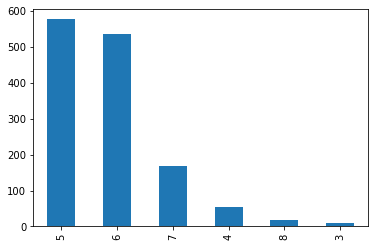

In [393]:
# Visualise the target variable using Bar Plot
df['Signal_Strength'].value_counts().plot(kind='bar')

**1.1 e -Share insights from the initial data analysis (at least 2)**

- Signal strength is biased towards 5 & 6.
- Range of sensors is different for different attributes, hence normalization required.

**1.2 a - Split the data into X & Y.**

In [394]:
# To split the data into Independent variables and Target Variable
X = df.iloc[:, :-1]
Y = df.iloc[:,-1]

**1.2 b - Split the data into train & test with 70:30 proportion.**

In [395]:
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)

**1.2 c - Print shape of all the 4 variables and verify if train and test data is in sync.**

In [396]:
# To print the shape of X_train
X_train.shape

(1087, 11)

In [397]:
# To print the shape of Y_train
Y_train.shape

(1087,)

In [398]:
# To print the shape of X_test
X_test.shape

(272, 11)

In [399]:
# To print the shape of Y_test
Y_test.shape

(272,)

In [400]:
# Using assert statements for verifying whether Train and Test Data are in syn or not
assert X_train.shape[0] == Y_train.shape[0], "Number of samples in X_train and Y_train do not match"
assert X_test.shape[0] == Y_test.shape[0], "Number of samples in X_test and Y_test do not match"

print("Train and test data are in sync")

Train and test data are in sync


In [401]:
#################################### OR #######################################

In [402]:
# Using if _ else loop, for verifying whether Train and Test Data are in syn or not
if X_train.shape[0] == Y_train.shape[0] and X_test.shape[0] == Y_test.shape[0]:
    print("Train and test data are in sync")
else:
    print("Train and test data are not in sync")

Train and test data are in sync


**1.2 d - Normalise the train and test data with appropriate method.**

In [403]:
# Standardize the independent and test variables.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**1.2 e - Transform Labels into format acceptable by Neural Network**

In [404]:
# Using One Hot Encoding i.e by creating the dummy variables
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

**1.3 a - Design a Neural Network to train a classifier**

In [405]:
# Clearing the session in Keras
backend.clear_session()
# To receive the same output everytime
# Fixing the seed for NumPy random number generators to 42
np.random.seed(42)
# Fixing the set the seed for the Python random number generator to 42
import random
random.seed(42)
# Fixing the seed for the TensorFlow random number generator to 42
tf.random.set_seed(42)

In [406]:
# Create the model
model = Sequential()

In [407]:
# Adding layers [layers and activations]
# Input Layer
model.add(Dense(11, kernel_initializer='normal', input_dim = X_train.shape[1], activation = 'relu'))
# Hidden Layer 2
model.add(Dense(9, activation='relu'))
# Output Layer
model.add(Dense(9, activation = 'softmax'))

In [408]:
# Create optimizer with default learning rate
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [409]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 9)                 108       
                                                                 
 dense_2 (Dense)             (None, 9)                 90        
                                                                 
Total params: 330 (1.29 KB)
Trainable params: 330 (1.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**1.3 b - Train the classifier using previously designed Architecture**

In [410]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, batch_size=128)

Epoch 1/200
9/9 [==============================] - 2s 62ms/step - loss: 2.1696 - accuracy: 0.2318 - val_loss: 2.1426 - val_accuracy: 0.2904
Epoch 2/200
9/9 [==============================] - 0s 13ms/step - loss: 2.1203 - accuracy: 0.3579 - val_loss: 2.0948 - val_accuracy: 0.3897
Epoch 3/200
9/9 [==============================] - 0s 13ms/step - loss: 2.0728 - accuracy: 0.4305 - val_loss: 2.0470 - val_accuracy: 0.4522
Epoch 4/200
9/9 [==============================] - 0s 11ms/step - loss: 2.0234 - accuracy: 0.4535 - val_loss: 1.9933 - val_accuracy: 0.4926
Epoch 5/200
9/9 [==============================] - 0s 17ms/step - loss: 1.9676 - accuracy: 0.4775 - val_loss: 1.9329 - val_accuracy: 0.5184
Epoch 6/200
9/9 [==============================] - 0s 11ms/step - loss: 1.9045 - accuracy: 0.4959 - val_loss: 1.8663 - val_accuracy: 0.5294
Epoch 7/200
9/9 [==============================] - 0s 12ms/step - loss: 1.8355 - accuracy: 0.5032 - val_loss: 1.7927 - val_accuracy: 0.5221
Epoch 8/200
9/9 [===

9/9 [==============================] - 0s 17ms/step - loss: 0.9153 - accuracy: 0.6081 - val_loss: 0.9226 - val_accuracy: 0.6287
Epoch 118/200
9/9 [==============================] - 0s 15ms/step - loss: 0.9140 - accuracy: 0.6072 - val_loss: 0.9217 - val_accuracy: 0.6250
Epoch 119/200
9/9 [==============================] - 0s 16ms/step - loss: 0.9134 - accuracy: 0.6072 - val_loss: 0.9227 - val_accuracy: 0.6287
Epoch 120/200
9/9 [==============================] - 0s 14ms/step - loss: 0.9129 - accuracy: 0.6109 - val_loss: 0.9237 - val_accuracy: 0.6250
Epoch 121/200
9/9 [==============================] - 0s 15ms/step - loss: 0.9126 - accuracy: 0.6081 - val_loss: 0.9230 - val_accuracy: 0.6287
Epoch 122/200
9/9 [==============================] - 0s 12ms/step - loss: 0.9116 - accuracy: 0.6090 - val_loss: 0.9223 - val_accuracy: 0.6250
Epoch 123/200
9/9 [==============================] - 0s 14ms/step - loss: 0.9110 - accuracy: 0.6127 - val_loss: 0.9226 - val_accuracy: 0.6250
Epoch 124/200
9/9 [=

Epoch 175/200
9/9 [==============================] - 0s 11ms/step - loss: 0.8842 - accuracy: 0.6293 - val_loss: 0.9153 - val_accuracy: 0.6250
Epoch 176/200
9/9 [==============================] - 0s 10ms/step - loss: 0.8833 - accuracy: 0.6311 - val_loss: 0.9153 - val_accuracy: 0.6287
Epoch 177/200
9/9 [==============================] - 0s 11ms/step - loss: 0.8830 - accuracy: 0.6283 - val_loss: 0.9131 - val_accuracy: 0.6287
Epoch 178/200
9/9 [==============================] - 0s 11ms/step - loss: 0.8825 - accuracy: 0.6311 - val_loss: 0.9135 - val_accuracy: 0.6250
Epoch 179/200
9/9 [==============================] - 0s 12ms/step - loss: 0.8820 - accuracy: 0.6311 - val_loss: 0.9136 - val_accuracy: 0.6250
Epoch 180/200
9/9 [==============================] - 0s 12ms/step - loss: 0.8814 - accuracy: 0.6274 - val_loss: 0.9142 - val_accuracy: 0.6250
Epoch 181/200
9/9 [==============================] - 0s 11ms/step - loss: 0.8808 - accuracy: 0.6302 - val_loss: 0.9149 - val_accuracy: 0.6250
Epoch 

**1.3 c - Plot 2 separate visuals.**

**i) Training Loss and Validation Loss**

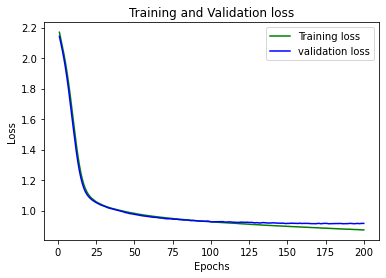

In [411]:
# To get the training loss
loss_train = model.history.history['loss']
# To get the validation loss
loss_val = model.history.history['val_loss']
epochs = range(1,200+1)
# Plotting Training and Validation loss at different epochs
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
# To add the title as 'Training and Validation loss' to the plot
plt.title('Training and Validation loss')
# To add xlabel as 'Epochs' to the plot
plt.xlabel('Epochs')
# To add xlabel as 'Loss' to the plot
plt.ylabel('Loss')

plt.legend()
plt.show()

**1.3 c - ii) Training Accuracy and Validation Accuracy**

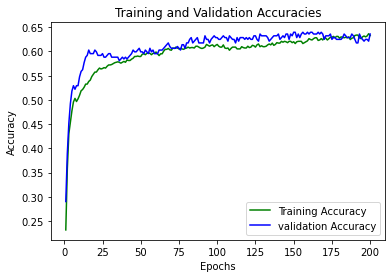

In [412]:
# To get the training loss
Accuracy_train = model.history.history['accuracy']
# To get the validation loss
Accuracy_val = model.history.history['val_accuracy']
epochs = range(1,200+1)
# Plotting Training and Validation loss at different epochs
plt.plot(epochs, Accuracy_train, 'g', label='Training Accuracy')
plt.plot(epochs, Accuracy_val, 'b', label='validation Accuracy')
# To add the title as 'Training and Validation loss' to the plot
plt.title('Training and Validation Accuracies')
# To add xlabel as 'Epochs' to the plot
plt.xlabel('Epochs')
# To add xlabel as 'Loss' to the plot
plt.ylabel('Accuracy')

plt.legend()
plt.show()

**InSights:**

- The training loss (0.8726) and validation loss (0.9153) are close, and both are relatively high. Low accuracy and high loss values are indicative of underfitting.
- Need to update the existing architecture or with new architecture to improve the performance of the model.

**1.3 d - Design new architecture/update existing architecture in attempt to improve the performance of the model**

**1.3 d A) By Adding "REGULARIZATION" techniques for improving the model to the existing architecture**

In [413]:
# Clearing the session in Keras
backend.clear_session()
# To receive the same output everytime
# Fixing the seed for NumPy random number generators to 42
np.random.seed(42)
# Fixing the set the seed for the Python random number generator to 42
import random
random.seed(42)
# Fixing the seed for the TensorFlow random number generator to 42
tf.random.set_seed(42)

In [414]:
# Create the model
models = Sequential()

In [415]:
# Adding layers [layers and activations]
# Input Layer
models.add(Dense(11, kernel_initializer='normal', input_dim = X_train.shape[1], activation = 'relu'))
model.add(BatchNormalization())
# Hidden Layer 2
models.add(Dense(9, activation='relu'))
# Output Layer
models.add(Dense(9, activation = 'softmax'))

In [416]:
# Create optimizer with default learning rate
# Compile the model
models.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [417]:
models.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 9)                 108       
                                                                 
 dense_2 (Dense)             (None, 9)                 90        
                                                                 
Total params: 330 (1.29 KB)
Trainable params: 330 (1.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [418]:
historys = models.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, batch_size=128)

Epoch 1/200
9/9 [==============================] - 2s 51ms/step - loss: 2.1696 - accuracy: 0.2318 - val_loss: 2.1426 - val_accuracy: 0.2904
Epoch 2/200
9/9 [==============================] - 0s 10ms/step - loss: 2.1203 - accuracy: 0.3579 - val_loss: 2.0948 - val_accuracy: 0.3897
Epoch 3/200
9/9 [==============================] - 0s 14ms/step - loss: 2.0728 - accuracy: 0.4305 - val_loss: 2.0470 - val_accuracy: 0.4522
Epoch 4/200
9/9 [==============================] - 0s 16ms/step - loss: 2.0234 - accuracy: 0.4535 - val_loss: 1.9933 - val_accuracy: 0.4926
Epoch 5/200
9/9 [==============================] - 0s 13ms/step - loss: 1.9676 - accuracy: 0.4775 - val_loss: 1.9329 - val_accuracy: 0.5184
Epoch 6/200
9/9 [==============================] - 0s 14ms/step - loss: 1.9045 - accuracy: 0.4959 - val_loss: 1.8663 - val_accuracy: 0.5294
Epoch 7/200
9/9 [==============================] - 0s 14ms/step - loss: 1.8355 - accuracy: 0.5032 - val_loss: 1.7927 - val_accuracy: 0.5221
Epoch 8/200
9/9 [===

9/9 [==============================] - 0s 11ms/step - loss: 0.9153 - accuracy: 0.6081 - val_loss: 0.9226 - val_accuracy: 0.6287
Epoch 118/200
9/9 [==============================] - 0s 11ms/step - loss: 0.9140 - accuracy: 0.6072 - val_loss: 0.9217 - val_accuracy: 0.6250
Epoch 119/200
9/9 [==============================] - 0s 11ms/step - loss: 0.9134 - accuracy: 0.6072 - val_loss: 0.9227 - val_accuracy: 0.6287
Epoch 120/200
9/9 [==============================] - 0s 13ms/step - loss: 0.9129 - accuracy: 0.6109 - val_loss: 0.9237 - val_accuracy: 0.6250
Epoch 121/200
9/9 [==============================] - 0s 11ms/step - loss: 0.9126 - accuracy: 0.6081 - val_loss: 0.9230 - val_accuracy: 0.6287
Epoch 122/200
9/9 [==============================] - 0s 10ms/step - loss: 0.9116 - accuracy: 0.6090 - val_loss: 0.9223 - val_accuracy: 0.6250
Epoch 123/200
9/9 [==============================] - 0s 10ms/step - loss: 0.9110 - accuracy: 0.6127 - val_loss: 0.9226 - val_accuracy: 0.6250
Epoch 124/200
9/9 [=

Epoch 175/200
9/9 [==============================] - 0s 21ms/step - loss: 0.8842 - accuracy: 0.6293 - val_loss: 0.9153 - val_accuracy: 0.6250
Epoch 176/200
9/9 [==============================] - 0s 25ms/step - loss: 0.8833 - accuracy: 0.6311 - val_loss: 0.9153 - val_accuracy: 0.6287
Epoch 177/200
9/9 [==============================] - 0s 17ms/step - loss: 0.8830 - accuracy: 0.6283 - val_loss: 0.9131 - val_accuracy: 0.6287
Epoch 178/200
9/9 [==============================] - 0s 16ms/step - loss: 0.8825 - accuracy: 0.6311 - val_loss: 0.9135 - val_accuracy: 0.6250
Epoch 179/200
9/9 [==============================] - 0s 39ms/step - loss: 0.8820 - accuracy: 0.6311 - val_loss: 0.9136 - val_accuracy: 0.6250
Epoch 180/200
9/9 [==============================] - 0s 19ms/step - loss: 0.8814 - accuracy: 0.6274 - val_loss: 0.9142 - val_accuracy: 0.6250
Epoch 181/200
9/9 [==============================] - 0s 16ms/step - loss: 0.8808 - accuracy: 0.6302 - val_loss: 0.9149 - val_accuracy: 0.6250
Epoch 

In [419]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

9/9 [==============================] - 0s 5ms/step - loss: 0.9153 - accuracy: 0.6360
Test Loss: 0.9153216481208801
Test Accuracy: 0.6360294222831726


**1.3 d B) By Adding layer(s) along with the "REGULARIZATION" techniques & SGD optimizer for improving the model to the existing architecture**

In [420]:
# Clearing the session in Keras
backend.clear_session()
# To receive the same output everytime
# Fixing the seed for NumPy random number generators to 42
np.random.seed(42)
# Fixing the set the seed for the Python random number generator to 42
import random
random.seed(42)
# Fixing the seed for the TensorFlow random number generator to 42
tf.random.set_seed(42)

In [421]:
# Create the model
model1 = Sequential()

In [422]:
# Adding layers [layers and activations]
# Input Layer
model1.add(Dense(11, kernel_initializer='normal', input_dim = X_train.shape[1], activation = 'relu'))
model1.add(BatchNormalization())
model1.add(Dense(9, activation='relu'))
model1.add(BatchNormalization())
# Hidden Layer 2
model1.add(Dense(9, activation='relu'))
model1.add(BatchNormalization())
# Hidden layer 4
model1.add(Dense(9, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(9, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(9, activation='relu'))

# Output Layer
model1.add(Dense(9, activation = 'softmax'))

In [423]:
# Create optimizer with learning rate and momentum
# Compile the model
sgd = optimizers.SGD(learning_rate=1e-2, momentum = 0.9)
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [424]:
history1 = model1.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, batch_size=32)

Epoch 1/200
34/34 [==============================] - 9s 29ms/step - loss: 2.3856 - accuracy: 0.2539 - val_loss: 2.1088 - val_accuracy: 0.4669
Epoch 2/200
34/34 [==============================] - 0s 12ms/step - loss: 1.9987 - accuracy: 0.3836 - val_loss: 1.9983 - val_accuracy: 0.4926
Epoch 3/200
34/34 [==============================] - 0s 10ms/step - loss: 1.7836 - accuracy: 0.4434 - val_loss: 1.8618 - val_accuracy: 0.5184
Epoch 4/200
34/34 [==============================] - 0s 10ms/step - loss: 1.6368 - accuracy: 0.4894 - val_loss: 1.7069 - val_accuracy: 0.5368
Epoch 5/200
34/34 [==============================] - 0s 10ms/step - loss: 1.5281 - accuracy: 0.5290 - val_loss: 1.5634 - val_accuracy: 0.5331
Epoch 6/200
34/34 [==============================] - 0s 8ms/step - loss: 1.4030 - accuracy: 0.5373 - val_loss: 1.4348 - val_accuracy: 0.5478
Epoch 7/200
34/34 [==============================] - 0s 8ms/step - loss: 1.3056 - accuracy: 0.5547 - val_loss: 1.3413 - val_accuracy: 0.5551
Epoch 8/

34/34 [==============================] - 0s 9ms/step - loss: 0.8411 - accuracy: 0.6247 - val_loss: 0.9686 - val_accuracy: 0.5993
Epoch 116/200
34/34 [==============================] - 0s 8ms/step - loss: 0.8554 - accuracy: 0.6228 - val_loss: 0.9770 - val_accuracy: 0.6029
Epoch 117/200
34/34 [==============================] - 0s 15ms/step - loss: 0.8442 - accuracy: 0.6348 - val_loss: 0.9869 - val_accuracy: 0.6066
Epoch 118/200
34/34 [==============================] - 0s 10ms/step - loss: 0.8598 - accuracy: 0.6237 - val_loss: 0.9909 - val_accuracy: 0.5956
Epoch 119/200
34/34 [==============================] - 0s 10ms/step - loss: 0.8598 - accuracy: 0.6375 - val_loss: 0.9787 - val_accuracy: 0.6103
Epoch 120/200
34/34 [==============================] - 0s 10ms/step - loss: 0.8352 - accuracy: 0.6293 - val_loss: 0.9942 - val_accuracy: 0.6066
Epoch 121/200
34/34 [==============================] - 0s 9ms/step - loss: 0.8312 - accuracy: 0.6302 - val_loss: 0.9917 - val_accuracy: 0.6103
Epoch 122

**1.3 e - Plot visuals as in Q3.C and share insights about difference observed in both the models**

**1.3 d A) Plot Visuals**

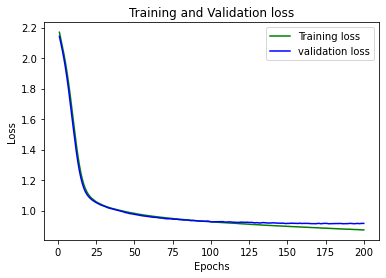

In [425]:
# To get the training loss
loss_train = models.history.history['loss']
# To get the validation loss
loss_val = models.history.history['val_loss']
epochs = range(1,200+1)
# Plotting Training and Validation loss at different epochs
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
# To add the title as 'Training and Validation loss' to the plot
plt.title('Training and Validation loss')
# To add xlabel as 'Epochs' to the plot
plt.xlabel('Epochs')
# To add xlabel as 'Loss' to the plot
plt.ylabel('Loss')

plt.legend()
plt.show()

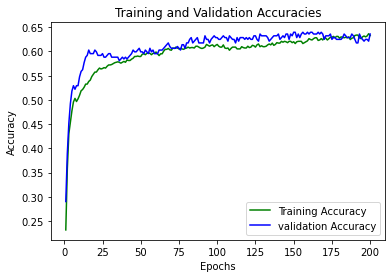

In [426]:
# To get the training loss
Accuracy_train = models.history.history['accuracy']
# To get the validation loss
Accuracy_val = models.history.history['val_accuracy']
epochs = range(1,200+1)
# Plotting Training and Validation loss at different epochs
plt.plot(epochs, Accuracy_train, 'g', label='Training Accuracy')
plt.plot(epochs, Accuracy_val, 'b', label='validation Accuracy')
# To add the title as 'Training and Validation loss' to the plot
plt.title('Training and Validation Accuracies')
# To add xlabel as 'Epochs' to the plot
plt.xlabel('Epochs')
# To add xlabel as 'Loss' to the plot
plt.ylabel('Accuracy')

plt.legend()
plt.show()

**1.3 d B) Plot Visuals**

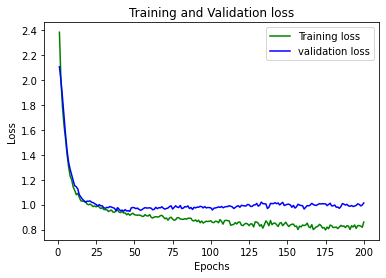

In [427]:
# To get the validation loss
loss_train = model1.history.history['loss']
loss_val = model1.history.history['val_loss']
epochs = range(1,200+1)
# Plotting Training and Validation loss at different epochs
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
# To add the title as 'Training and Validation loss' to the plot
plt.title('Training and Validation loss')
# To add xlabel as 'Epochs' to the plot
plt.xlabel('Epochs')
# To add xlabel as 'Loss' to the plot
plt.ylabel('Loss')

plt.legend()
plt.show()

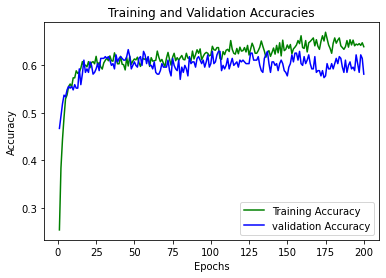

In [428]:
# To get the training loss
Accuracy_train = model1.history.history['accuracy']
# To get the validation loss
Accuracy_val = model1.history.history['val_accuracy']
epochs = range(1,200+1)
# Plotting Training and Validation loss at different epochs
plt.plot(epochs, Accuracy_train, 'g', label='Training Accuracy')
plt.plot(epochs, Accuracy_val, 'b', label='validation Accuracy')
# To add the title as 'Training and Validation loss' to the plot
plt.title('Training and Validation Accuracies')
# To add xlabel as 'Epochs' to the plot
plt.xlabel('Epochs')
# To add xlabel as 'Loss' to the plot
plt.ylabel('Accuracy')

plt.legend()
plt.show()

**1.3 d C) By Adding layer(s) along with the "REGULARIZATION" techniques, SGD optimizer & LearningRateScheduler for improving the model to the existing architecture**

In [429]:
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import LearningRateScheduler

# Clearing the session in Keras
tf.keras.backend.clear_session()

# To receive the same output every time
# Fixing the seed for NumPy random number generators to 42
np.random.seed(42)

# Fixing the seed for the Python random number generator to 42
import random
random.seed(42)

# Fixing the seed for the TensorFlow random number generator to 42
tf.random.set_seed(42)

# Create the model
modell = Sequential()

# Adding layers [layers and activations]
# Input Layer
modell.add(Dense(11, kernel_initializer='normal', input_dim=X_train.shape[1], activation='relu'))
modell.add(BatchNormalization())
modell.add(Dense(9, activation='relu'))
modell.add(BatchNormalization())

# Hidden Layer 2
modell.add(Dense(9, activation='relu'))
modell.add(BatchNormalization())

# Hidden layer 3
modell.add(Dense(9, activation='relu'))
modell.add(BatchNormalization())

# Output Layer
modell.add(Dense(9, activation='softmax'))

# Define the learning rate scheduler
def lr_scheduler(epoch):
    learning_rate = 1e-2
    return learning_rate

# Compile the model
sgd = optimizers.SGD(learning_rate=1e-2, momentum=0.9)
modell.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the learning rate scheduler callback
lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

# Training the model with batch size 32 and epochs 200
history = modell.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, batch_size=32, callbacks=[lr_scheduler_callback])

Epoch 1/200
34/34 [==============================] - 5s 23ms/step - loss: 1.7613 - accuracy: 0.4370 - val_loss: 1.4361 - val_accuracy: 0.5257 - lr: 0.0100
Epoch 2/200
34/34 [==============================] - 0s 8ms/step - loss: 1.1210 - accuracy: 0.5538 - val_loss: 1.1901 - val_accuracy: 0.4191 - lr: 0.0100
Epoch 3/200
34/34 [==============================] - 0s 8ms/step - loss: 1.0118 - accuracy: 0.5805 - val_loss: 1.1459 - val_accuracy: 0.4301 - lr: 0.0100
Epoch 4/200
34/34 [==============================] - 0s 11ms/step - loss: 0.9739 - accuracy: 0.5897 - val_loss: 1.0597 - val_accuracy: 0.5184 - lr: 0.0100
Epoch 5/200
34/34 [==============================] - 0s 8ms/step - loss: 0.9578 - accuracy: 0.5879 - val_loss: 1.0051 - val_accuracy: 0.5588 - lr: 0.0100
Epoch 6/200
34/34 [==============================] - 0s 8ms/step - loss: 0.9634 - accuracy: 0.5925 - val_loss: 0.9660 - val_accuracy: 0.5882 - lr: 0.0100
Epoch 7/200
34/34 [==============================] - 0s 8ms/step - loss: 0

Epoch 54/200
34/34 [==============================] - 0s 7ms/step - loss: 0.8469 - accuracy: 0.6265 - val_loss: 1.0012 - val_accuracy: 0.6029 - lr: 0.0100
Epoch 55/200
34/34 [==============================] - 0s 8ms/step - loss: 0.8610 - accuracy: 0.6458 - val_loss: 0.9753 - val_accuracy: 0.6103 - lr: 0.0100
Epoch 56/200
34/34 [==============================] - 0s 7ms/step - loss: 0.8509 - accuracy: 0.6421 - val_loss: 0.9830 - val_accuracy: 0.6103 - lr: 0.0100
Epoch 57/200
34/34 [==============================] - 0s 9ms/step - loss: 0.8706 - accuracy: 0.6118 - val_loss: 0.9575 - val_accuracy: 0.5956 - lr: 0.0100
Epoch 58/200
34/34 [==============================] - 0s 8ms/step - loss: 0.8502 - accuracy: 0.6366 - val_loss: 0.9886 - val_accuracy: 0.5919 - lr: 0.0100
Epoch 59/200
34/34 [==============================] - 0s 7ms/step - loss: 0.8405 - accuracy: 0.6293 - val_loss: 1.0180 - val_accuracy: 0.5846 - lr: 0.0100
Epoch 60/200
34/34 [==============================] - 0s 9ms/step - lo

Epoch 107/200
34/34 [==============================] - 0s 7ms/step - loss: 0.8407 - accuracy: 0.6366 - val_loss: 1.0483 - val_accuracy: 0.5588 - lr: 0.0100
Epoch 108/200
34/34 [==============================] - 0s 7ms/step - loss: 0.8185 - accuracy: 0.6449 - val_loss: 0.9931 - val_accuracy: 0.6140 - lr: 0.0100
Epoch 109/200
34/34 [==============================] - 0s 7ms/step - loss: 0.8134 - accuracy: 0.6458 - val_loss: 1.1077 - val_accuracy: 0.5625 - lr: 0.0100
Epoch 110/200
34/34 [==============================] - 0s 7ms/step - loss: 0.8180 - accuracy: 0.6467 - val_loss: 1.1442 - val_accuracy: 0.5294 - lr: 0.0100
Epoch 111/200
34/34 [==============================] - 0s 7ms/step - loss: 0.8161 - accuracy: 0.6403 - val_loss: 1.0921 - val_accuracy: 0.5221 - lr: 0.0100
Epoch 112/200
34/34 [==============================] - 0s 7ms/step - loss: 0.8245 - accuracy: 0.6247 - val_loss: 1.0479 - val_accuracy: 0.5478 - lr: 0.0100
Epoch 113/200
34/34 [==============================] - 0s 7ms/st

**1.3 d C)Plot visuals**

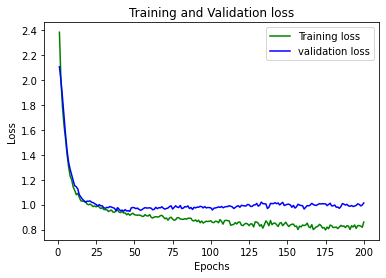

In [430]:
# To get the validation loss
loss_train = model1.history.history['loss']
loss_val = model1.history.history['val_loss']
epochs = range(1,200+1)
# Plotting Training and Validation loss at different epochs
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
# To add the title as 'Training and Validation loss' to the plot
plt.title('Training and Validation loss')
# To add xlabel as 'Epochs' to the plot
plt.xlabel('Epochs')
# To add xlabel as 'Loss' to the plot
plt.ylabel('Loss')

plt.legend()
plt.show()

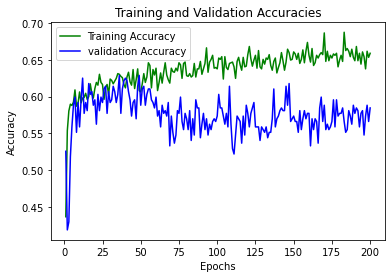

In [431]:
# To get the training loss
Accuracy_train = modell.history.history['accuracy']
# To get the validation loss
Accuracy_val = modell.history.history['val_accuracy']
epochs = range(1,200+1)
# Plotting Training and Validation loss at different epochs
plt.plot(epochs, Accuracy_train, 'g', label='Training Accuracy')
plt.plot(epochs, Accuracy_val, 'b', label='validation Accuracy')
# To add the title as 'Training and Validation loss' to the plot
plt.title('Training and Validation Accuracies')
# To add xlabel as 'Epochs' to the plot
plt.xlabel('Epochs')
# To add xlabel as 'Loss' to the plot
plt.ylabel('Accuracy')

plt.legend()
plt.show()

**1.3 d D) By Adding layer(s) along with the "REGULARIZATION" techniques, SGD optimizer & EarlyStopping for improving the model to the existing architecture**

In [432]:
# Create the model
modele = Sequential()

# Input Layer with BatchNormalization and Dropout
modele.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
modele.add(BatchNormalization())
modele.add(Dropout(0.2))

# Hidden Layers with BatchNormalization and Dropout
modele.add(Dense(64, activation='relu'))
modele.add(BatchNormalization())
modele.add(Dropout(0.2))

modele.add(Dense(64, activation='relu'))
modele.add(BatchNormalization())
modele.add(Dropout(0.2))

# Output Layer
modele.add(Dense(9, activation='softmax'))

# Implement Learning Rate Scheduling
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model
modele.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Implement Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = modele.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, batch_size=32, callbacks=[early_stopping])


Epoch 1/200
34/34 [==============================] - 4s 21ms/step - loss: 1.7797 - accuracy: 0.4361 - val_loss: 1.0818 - val_accuracy: 0.5846
Epoch 2/200
34/34 [==============================] - 0s 8ms/step - loss: 1.0998 - accuracy: 0.5704 - val_loss: 0.9717 - val_accuracy: 0.6029
Epoch 3/200
34/34 [==============================] - 0s 9ms/step - loss: 1.0238 - accuracy: 0.5676 - val_loss: 0.9905 - val_accuracy: 0.6103
Epoch 4/200
34/34 [==============================] - 0s 9ms/step - loss: 0.9826 - accuracy: 0.5842 - val_loss: 0.9939 - val_accuracy: 0.5956
Epoch 5/200
34/34 [==============================] - 0s 9ms/step - loss: 0.9680 - accuracy: 0.5667 - val_loss: 0.9561 - val_accuracy: 0.6066
Epoch 6/200
34/34 [==============================] - 0s 8ms/step - loss: 0.9595 - accuracy: 0.5851 - val_loss: 0.9673 - val_accuracy: 0.6103
Epoch 7/200
34/34 [==============================] - 0s 9ms/step - loss: 0.9086 - accuracy: 0.6053 - val_loss: 0.9512 - val_accuracy: 0.6507
Epoch 8/200


**1.3 d D) Plot visuals**

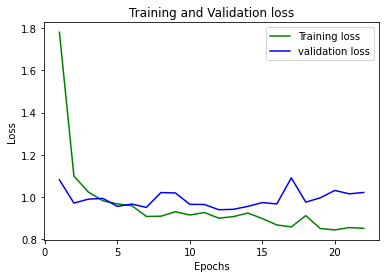

In [433]:
# To get the validation loss
loss_train = modele.history.history['loss']
loss_val = modele.history.history['val_loss']
epochs = range(1,22+1)
# Plotting Training and Validation loss at different epochs
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
# To add the title as 'Training and Validation loss' to the plot
plt.title('Training and Validation loss')
# To add xlabel as 'Epochs' to the plot
plt.xlabel('Epochs')
# To add xlabel as 'Loss' to the plot
plt.ylabel('Loss')

plt.legend()
plt.show()

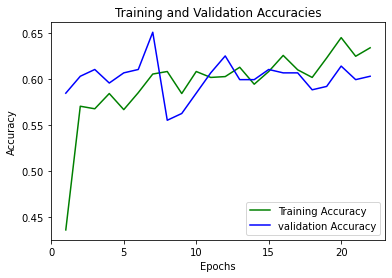

In [434]:
# To get the training loss
Accuracy_train = modele.history.history['accuracy']
# To get the validation loss
Accuracy_val = modele.history.history['val_accuracy']
epochs = range(1,22+1)
# Plotting Training and Validation loss at different epochs
plt.plot(epochs, Accuracy_train, 'g', label='Training Accuracy')
plt.plot(epochs, Accuracy_val, 'b', label='validation Accuracy')
# To add the title as 'Training and Validation loss' to the plot
plt.title('Training and Validation Accuracies')
# To add xlabel as 'Epochs' to the plot
plt.xlabel('Epochs')
# To add xlabel as 'Loss' to the plot
plt.ylabel('Accuracy')

plt.legend()
plt.show()

**Overall Observations:**

- A) On adding the BatchNormalization() to the input layer, found that test data accuarcy(0.6360) is more than train data(0.6329) i.e underfitting.
- B) On increasing the hidden layers() and  BatchNormalization() to the layers with SGD and momentum optimizer, found that train data accuracy (0.6385) is more than test data (0.5809).
- C) On increasing the hidden layers(), BatchNormalization() to the layers with SGD and momentum optimizer and adding the LearningRateScheduler for the existing architecture, found that train data accuracy(0.6587) is more than test data accuracy(0.5846).
- D) On increasing the hidden layers(), BatchNormalization() to the layers with Adam optimizer and adding the EarlyStopping for the existing architecture, found that train data accuracy(0.6339)is more than test data accuracy(0.6029).

- From B) and C), with epochs = 200, lr_rate= le-2 and batch_sizes are 128 & 32, 
Comparing the validation loss, we can see that C) (val_loss: 1.0132) has a lower validation loss than B) (val_loss: 1.0540). In terms of loss, C) is better as it achieves a lower validation loss. 
Comparing the accuracies, we can see that C) has a smaller difference between training and validation accuracy (0.0576) compared to B) (0.0741).
This means that C) generalizes better to unseen data. C) is performing relatively better and is a good fit compared to B).

- From C) and D), with epochs = 200, lr_rate= le-2, batch_size = 32, Optimizers are SGD with momentum and Adam,

In "C)" (SGD with Momentum and BatchNormalization), the reported validation loss is 1.0132, while the training loss is 0.8597. This indicates that the model is performing better on the training data (lower loss) than on the validation data (higher loss), suggesting some overfitting.

In "D) (Adam with EarlyStopping and BatchNormalization), the reported validation loss is 0.9229, and the training loss is 1.0084. Here, the validation loss is slightly higher than the training loss, indicating that the model is generalizing better to unseen data, and the gap between training and validation loss is smaller compared to "C)."

So, based on both accuracy and loss metrics, "D)" seems to be performing relatively better and shows less overfitting compared to "C)." Achieving the best balance between training and validation performance is crucial for building a model that generalizes well to new, unseen data. 

- Acuuracy improved by '~2%' from all the combinations performed.